# New York City Taxi  
 - dropoffs from pickups going to Theatre district
 - for SQL commands generating the tables, please see https://github.com/jerryxhe/taxi2popularity/blob/master/theatre/prepare4analysis.sql

In [3]:
library(MASS)
library(RPostgreSQL)
con = dbConnect(dbDriver("PostgreSQL"), dbname = "nyc-taxi-data")
query = function(sql) { fetch(dbSendQuery(con, sql), n = 1e8) }
library(ggplot2)
library(ggmap)
library(plyr)
library(dplyr)
library(reshape2)
library(zoo)
library(scales)
library(extrafont)
#library(grid)
library(rgdal)
library(maptools)
tracts = spTransform(readOGR("../nyc-taxi-data/nyct2010_15b", layer = "nyct2010"), CRS("+proj=longlat +datum=WGS84"))
tracts@data$id = as.character(as.numeric(rownames(tracts@data)) + 1)
tracts.points = fortify(tracts, region = "id")
tracts.map = inner_join(tracts.points, tracts@data, by = "id")
manhattan_map = filter(tracts.map, BoroName == "Manhattan")
library(raster)
rrt_map = get_googlemap(center = c(-73.9888656, 40.7590577), zoom = 13, style = "feature:poi|visibility:off")

Loading required package: DBI

Attaching package: ‘dplyr’

The following object is masked _by_ ‘.GlobalEnv’:

    query

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registering fonts with R
Loading required package: sp
rgdal: version: 1.2-5, (SVN revision 648)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 1.11.3, released 2015/09/16
 Path to GDAL shared files: /usr/share/gdal/1.11
 Loaded PROJ.4 runtime: Rel. 4.9.2, 08 September 2015, [PJ_VERSION: 492]
 Path to PROJ.4 shared files: (autodetected)
 Link

OGR data source with driver: ESRI Shapefile 
Source: "../nyc-taxi-data/nyct2010_15b", layer: "nyct2010"
with 2166 features
It has 11 fields



Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select

The following objects are masked from ‘package:MASS’:

    area, select

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=40.759058,-73.988866&zoom=13&size=640x640&scale=2&maptype=terrain&style=feature:poi%7Cvisibility:off&sensor=false


In [4]:
pickups = query("SELECT * FROM ambassador_theatre_pickups_by_lat_lon_hour WHERE week_start='2008-12-29' and pickup_hour=7")

In [10]:
nrow(pickups)

[1] 3984

In [12]:
theatres = query("SELECT * from custom_locations LIMIT 3")

png 
  2

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”Warning message:
“Removed 293 rows containing missing values (geom_point).”

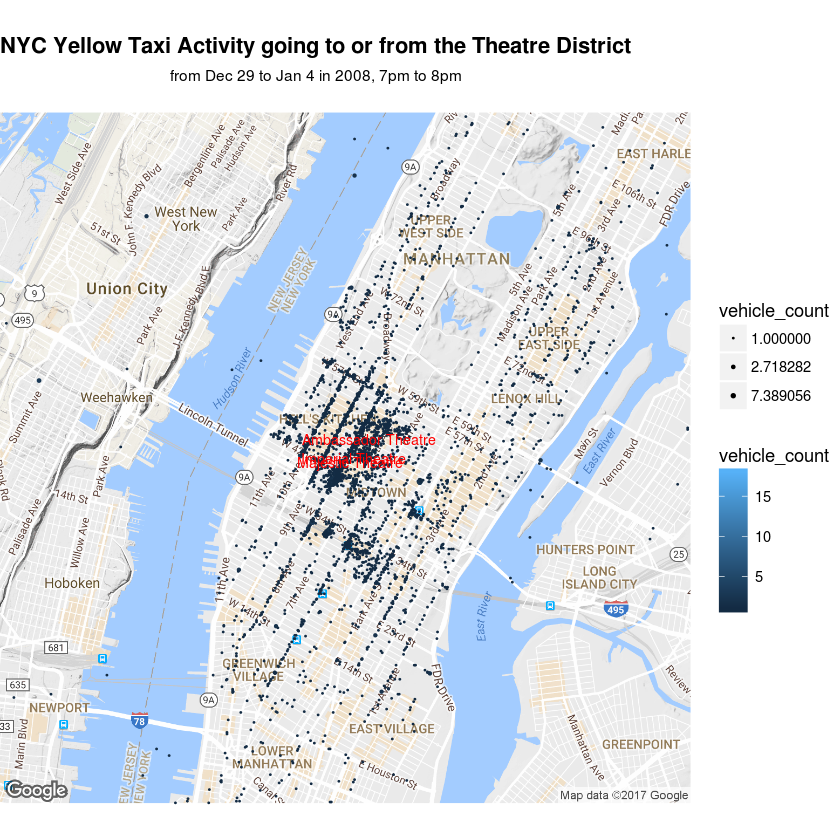

In [13]:
title_with_subtitle = function(title, subtitle = "") {
  ggtitle(bquote(atop(bold(.(title)), atop(.(subtitle)))))
}

alpha_range = c(0.14, 1)
size_range = c(0.134, 1)
png("taxi.png", width = 640, height = 900, bg = "#f4f4f4")
dev.off()
p=ggmap(rrt_map, extent = "device") + 
geom_point(data=pickups,
              aes(x = pickup_lon, y = pickup_lat, size = vehicle_count, color=vehicle_count))+
  scale_size_continuous(range = alpha_range, trans = "log", limits = range(pickups$vehicle_count)) +
  title_with_subtitle("NYC Yellow Taxi Activity going to or from the Theatre District", "from Dec 29 to Jan 4 in 2008, 7pm to 8pm")
p = p+geom_text(data = theatres, aes(x = lon, y = lat, label = name), 
          size = 3, vjust = "center", hjust = "center",color = "red")
print(p)